In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
C_data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
C_data.head()

In [ ]:
C_data.info()

In [ ]:
X = C_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values
print(X)

WCSS - within clusters sum of squares

In [ ]:
wcss = []
for i in range(1,11):
  kmean = KMeans(i, init='k-means++',random_state=42)
  kmean.fit(X)
  wcss.append(kmean.inertia_)

sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS value')
plt.show()

We can clearly see that after n=5 the elbow break is not that drastic so take n=k=5 for the fitting as optimum number of cluster.

We can also see from below graph that n=k=5 is optimum clusters.

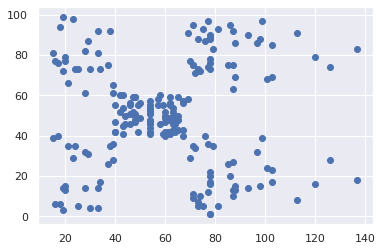

In [48]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
kmean = KMeans(5,init='k-means++',random_state=0)

Y = kmean.fit_predict(X)
print(Y)

In [57]:
w=['green','yellow','red','blue','orange']
w[2]

'red'

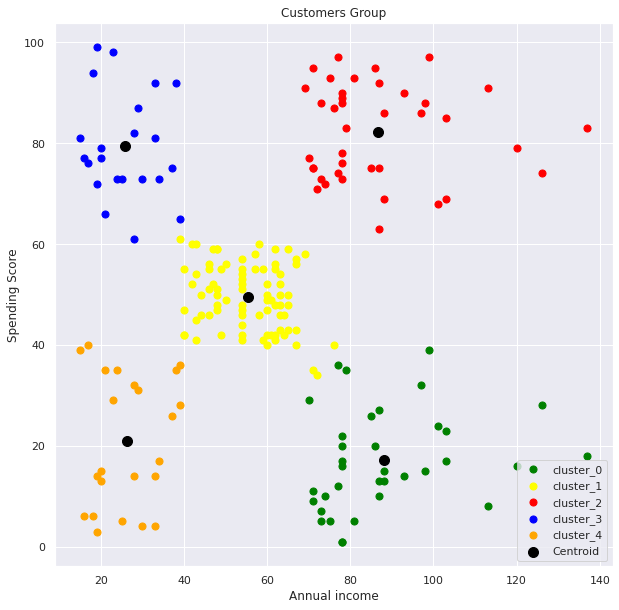

In [62]:
plt.figure(figsize=(10,10))
for i in range(0,5):
 plt.scatter(X[Y==i,0],X[Y==i,1],s=50,c=w[i], label='cluster_'+str(i))
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='black',label='Centroid')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.title('Customers Group')
plt.legend()
plt.show() 

In [ ]:
C_data['Labels'] = Y
C_data.head()